<a href="https://colab.research.google.com/github/vincent4u/vince-file/blob/main/SHAP_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving dataBiomass_CE880_1.csv to dataBiomass_CE880_1.csv


In [3]:
!pip install shap

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.multioutput import MultiOutputRegressor
np.random.seed(42)
from scipy.stats import pearsonr
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
dts=pd.read_csv("/content/dataBiomass_CE880_1.csv")
df=dts.iloc[0:336,1:16]

RMSE Scores: [0.38022842 0.57828503 0.39092927 0.3287123  0.32580858 0.59879766
 0.38330055]
R^2 Scores: [0.8813531  0.7359121  0.8616071  0.8989066  0.88068    0.646629
 0.80925316]
Overall R^2 Score: 0.8163344264030457


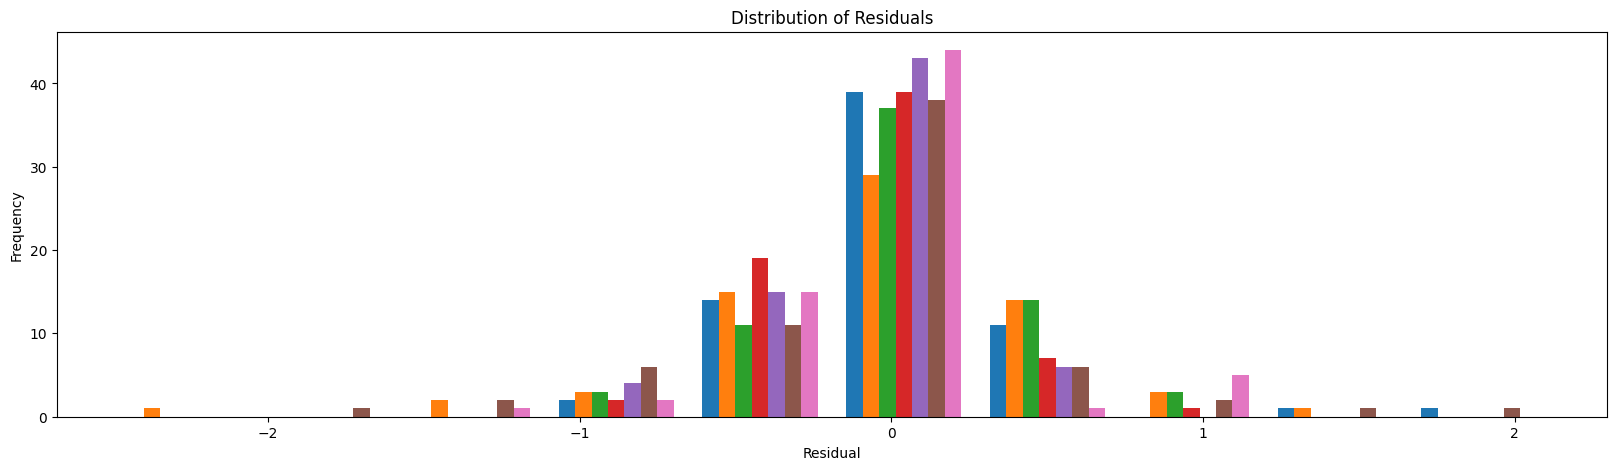

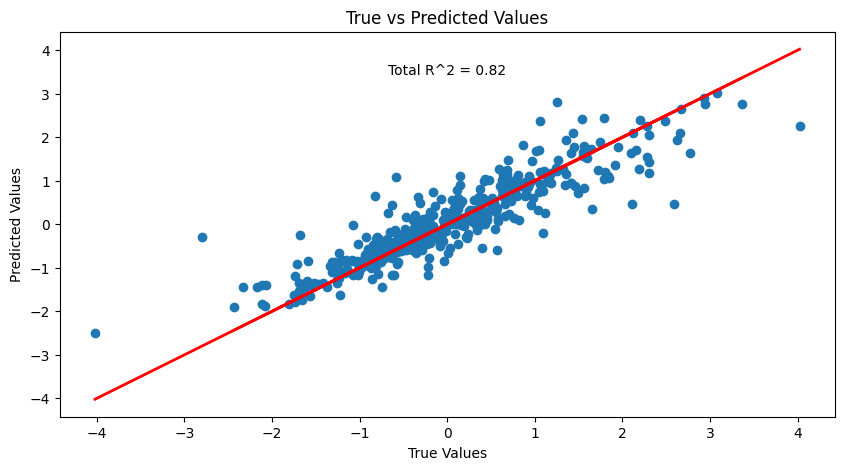

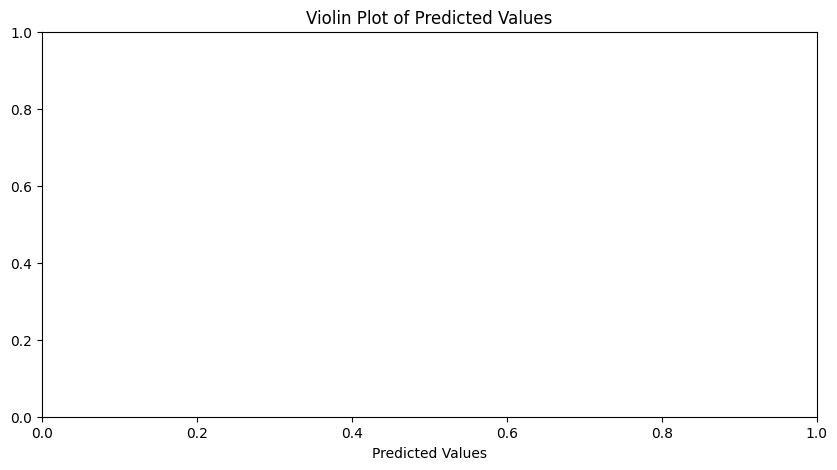

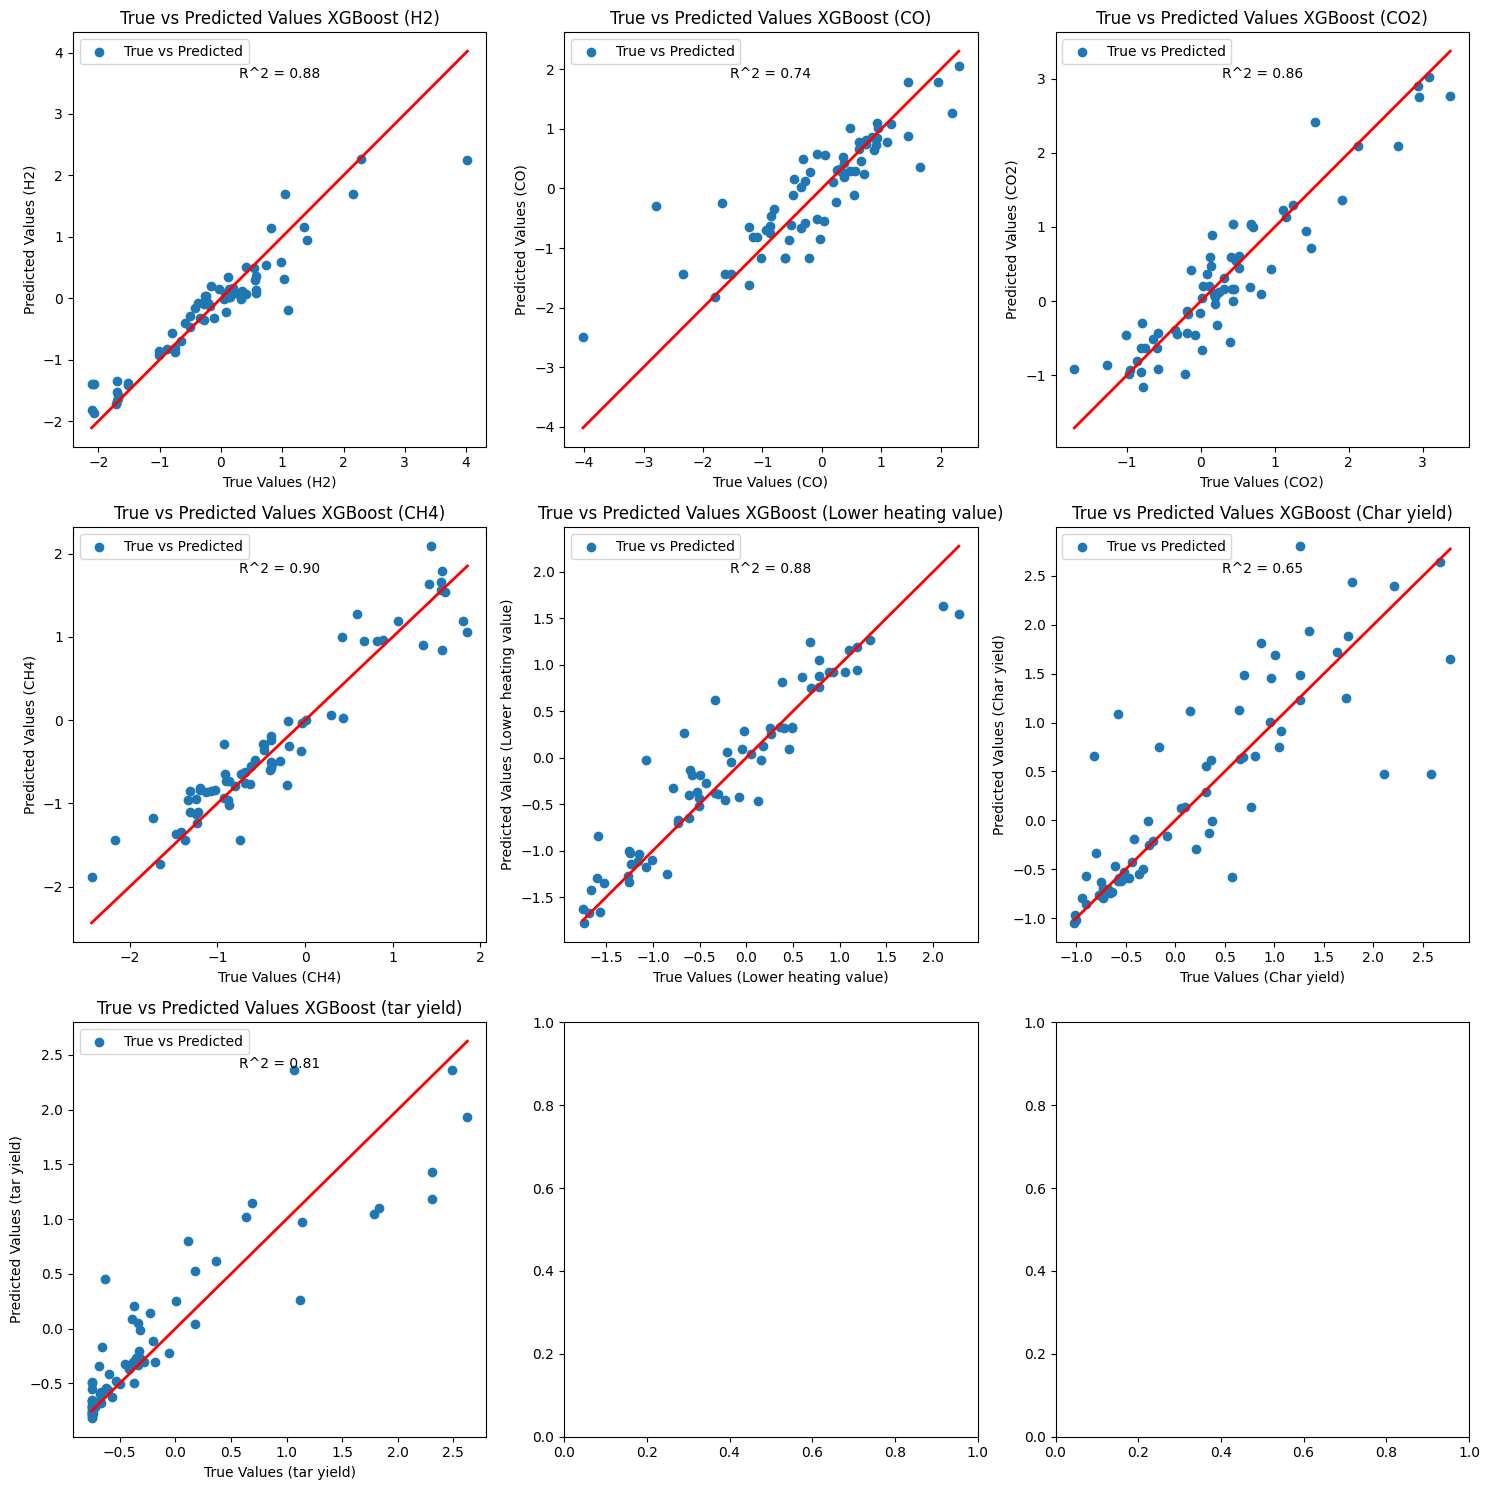

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Set up features (X)
features = df[['Cellulose', 'Hemicellulose', 'Lignin', 'Temp', 'Pressure',
                'Equivalance mass ratio', 'Steam to biomass mass ratio',
                'Superficial gas velocity']]
X = pd.DataFrame(features.values, columns=features.columns)

# Set up targets (y)
targets = df[['H2', 'CO', 'CO2', 'CH4', 'Lower heating value', 'Char yield', 'tar yield']]
y = pd.DataFrame(targets.values, columns=targets.columns)

# Split the dataset into training and testing sets first
features_train, features_test, targets_train, targets_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RobustScaler for features
feature_scaler = RobustScaler()

# Fit and transform the features
X_train = feature_scaler.fit_transform(features_train)
X_test = feature_scaler.transform(features_test)

# Convert the scaled arrays back to DataFrames with original column names
X_train = pd.DataFrame(X_train, columns=features.columns)
X_test = pd.DataFrame(X_test, columns=features.columns)

# Initialize StandardScaler for targets
target_scaler = StandardScaler()

# Fit and transform the targets
y_train = target_scaler.fit_transform(targets_train)
y_test = target_scaler.transform(targets_test)

# Convert the scaled targets back to DataFrames with original column names
y_train = pd.DataFrame(y_train, columns=targets.columns)
y_test = pd.DataFrame(y_test, columns=targets.columns)


# Set up features (X)
features = df[['Cellulose', 'Hemicellulose', 'Lignin', 'Temp', 'Pressure',
                'Equivalance mass ratio', 'Steam to biomass mass ratio',
                'Superficial gas velocity']]
X = pd.DataFrame(features.values, columns=features.columns)

# Set up targets (y)
targets = df[['H2', 'CO', 'CO2', 'CH4', 'Lower heating value', 'Char yield', 'tar yield']]
y = pd.DataFrame(targets.values, columns=targets.columns)

# Split the dataset into training and testing sets first
features_train, features_test, targets_train, targets_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RobustScaler for features
feature_scaler = RobustScaler()

# Fit and transform the features
X_train = feature_scaler.fit_transform(features_train)
X_test = feature_scaler.transform(features_test)

# Convert the scaled arrays back to DataFrames with original column names
X_train = pd.DataFrame(X_train, columns=features.columns)
X_test = pd.DataFrame(X_test, columns=features.columns)

# Initialize StandardScaler for targets
target_scaler = StandardScaler()

# Fit and transform the targets
y_train = target_scaler.fit_transform(targets_train)
y_test = target_scaler.transform(targets_test)

# Convert the scaled targets back to DataFrames with original column names
y_train = pd.DataFrame(y_train, columns=targets.columns)
y_test = pd.DataFrame(y_test, columns=targets.columns)

# Set the best hyperparameters found by Optuna
best_params = {
    "objective": "reg:squarederror",
    "n_estimators": 230,
    "verbosity": 0,
    "learning_rate": 0.06974211483527425,
    "max_depth": 5,
    "subsample": 0.6635632489941928,
    "colsample_bytree": 0.5153962652156941,
    "min_child_weight": 2
}

# Create an XGBRegressor model with the best hyperparameters
model = xgb.XGBRegressor(**best_params)

# Train the model on the training data
model.fit(X_train, y_train, verbose=False)

# Make predictions on the validation data
y_pred = model.predict(X_test)

# Calculating RMSE for each target column in y_pred
rmse_scores = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print("RMSE Scores:", rmse_scores)

# Calculating R2 for each target column in y_pred
r2_scores = r2_score(y_test, y_pred, multioutput='raw_values')
print("R^2 Scores:", r2_scores)

# Calculate and print overall R² score
overall_r2 = r2_score(y_test, y_pred)
print("Overall R^2 Score:", overall_r2)

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(20, 5))
plt.hist(residuals, bins=10)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# True vs Predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')

# Display total R^2 value
plt.text(0.5, 0.9, f'Total R^2 = {overall_r2:.2f}', ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

# Violin plot of predicted values (optional)
plt.figure(figsize=(10, 5))
# sns.violinplot(y=y_pred)
plt.xlabel('Predicted Values')
plt.title('Violin Plot of Predicted Values')
plt.show()

# Subplots for each target variable
num_columns = 3
num_rows = (len(targets.columns) + num_columns - 1) // num_columns
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Loop through each target variable
for i, target_column in enumerate(targets.columns):
    axes[i].scatter(y_test.iloc[:, i], y_pred[:, i], label='True vs Predicted')
    axes[i].plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
                  [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], color='red', linewidth=2)
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    axes[i].text(0.5, 0.9, f'R^2 = {r2:.2f}', ha='center', va='center', transform=axes[i].transAxes)
    axes[i].set_xlabel(f'True Values ({target_column})')
    axes[i].set_ylabel(f'Predicted Values ({target_column})')
    axes[i].set_title(f'True vs Predicted Values XGBoost ({target_column})')
    axes[i].legend()

plt.tight_layout()
fig.savefig('XGBoost_figure.png')
plt.show()

SHAP analysis for target variable: H2


 99%|===================| 471/476 [00:34<00:00]       

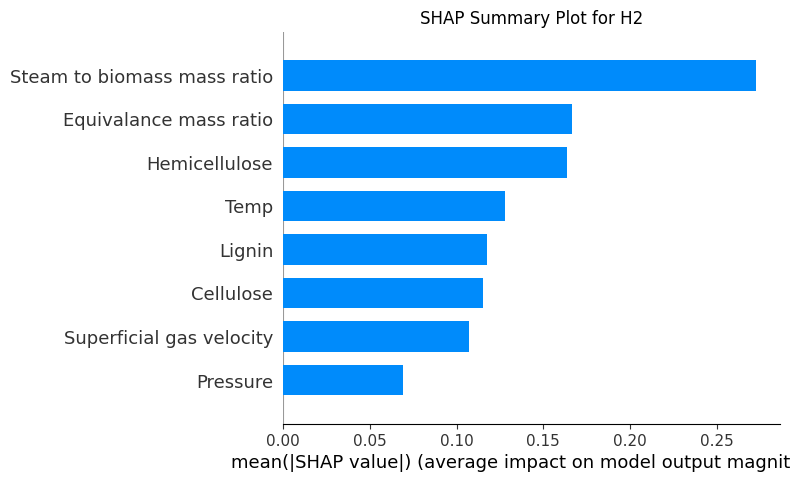

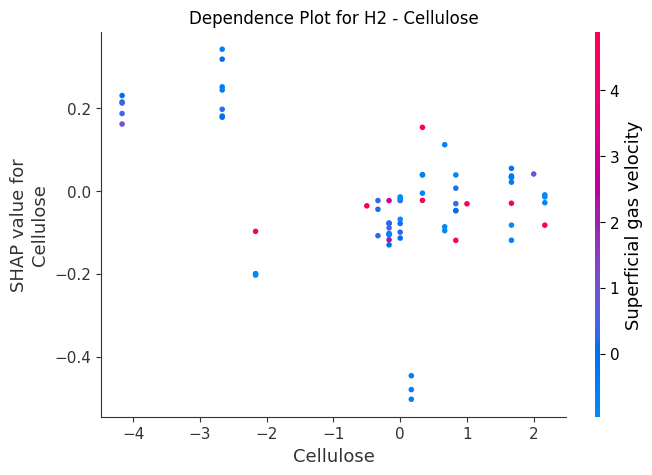

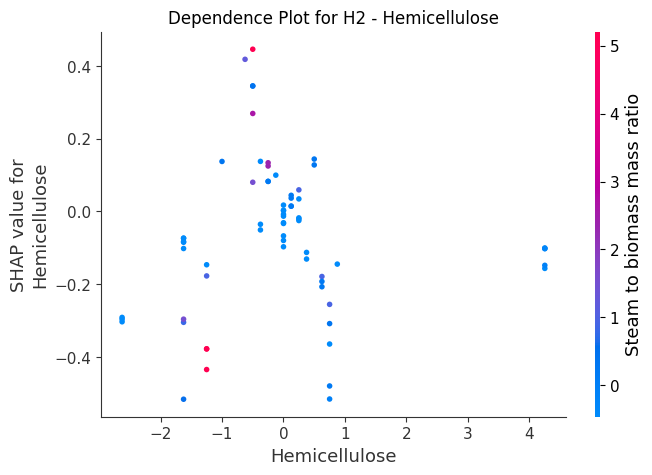

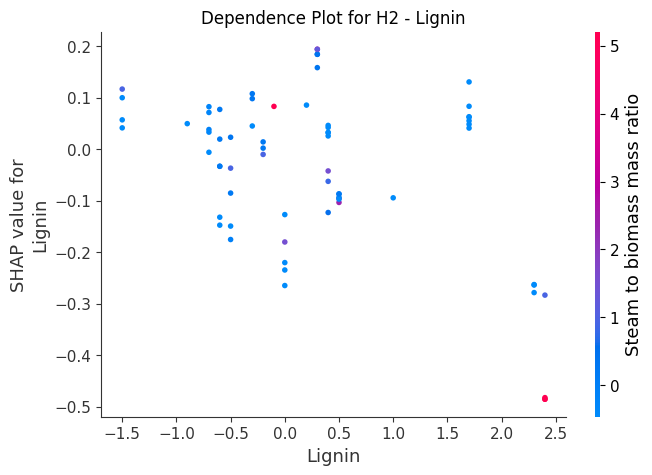

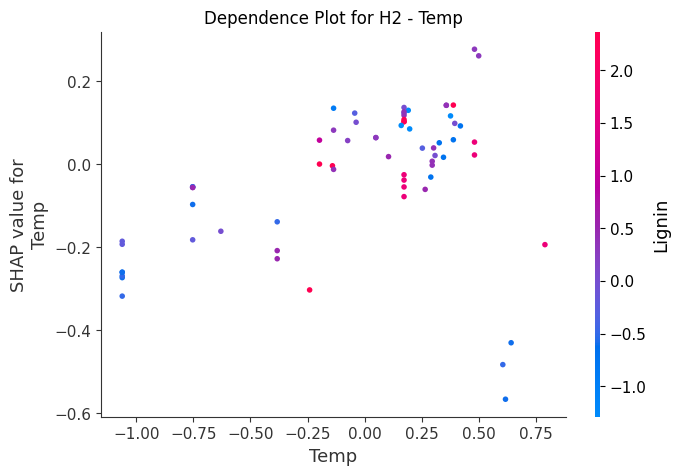

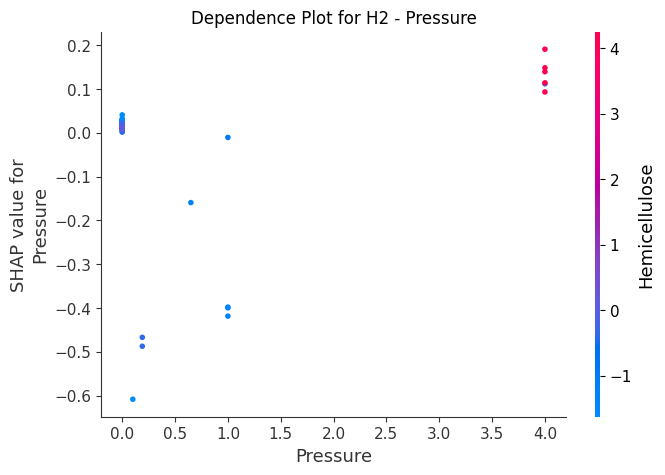

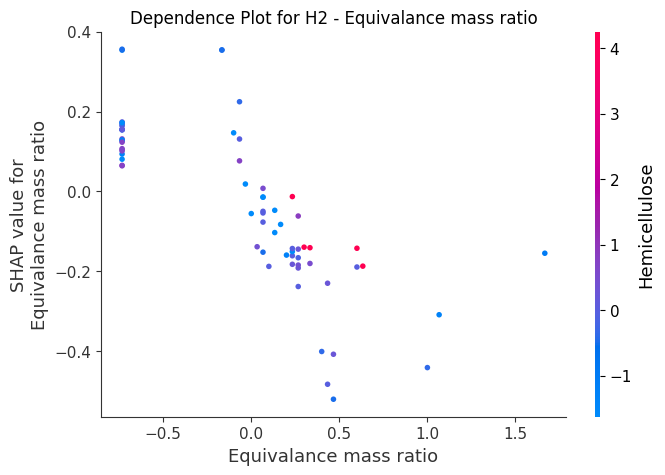

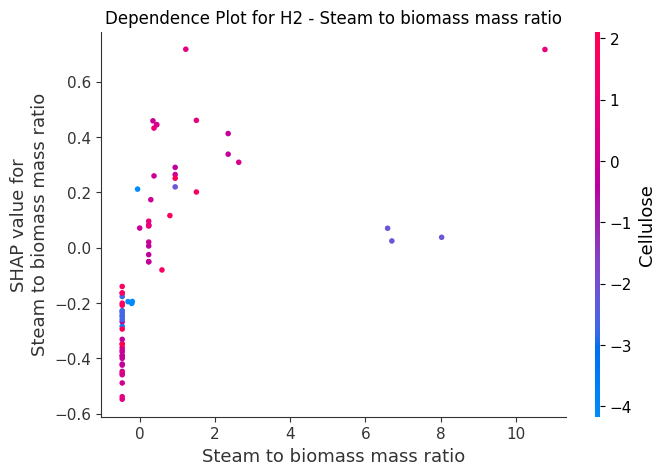

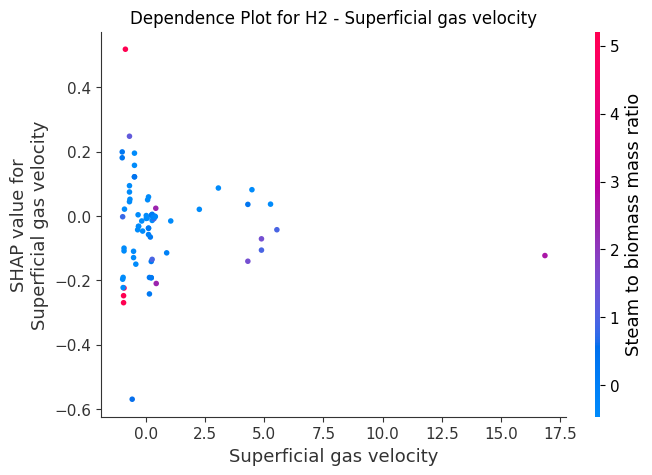

SHAP analysis for target variable: CO


 99%|===================| 472/476 [00:34<00:00]       

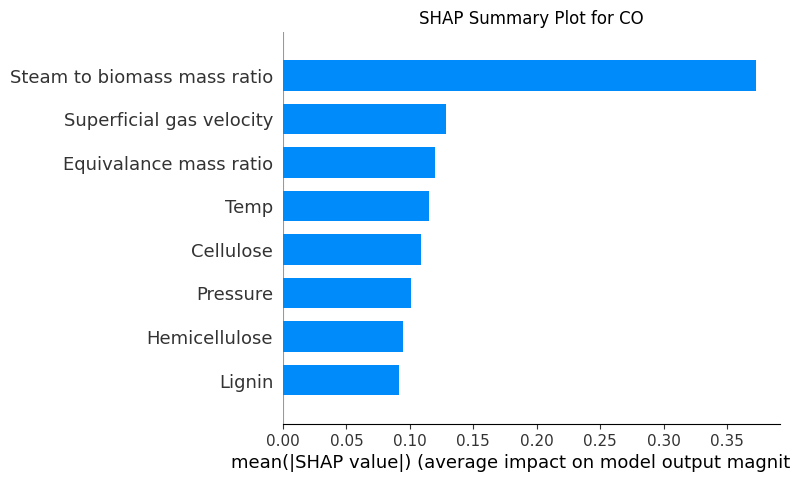

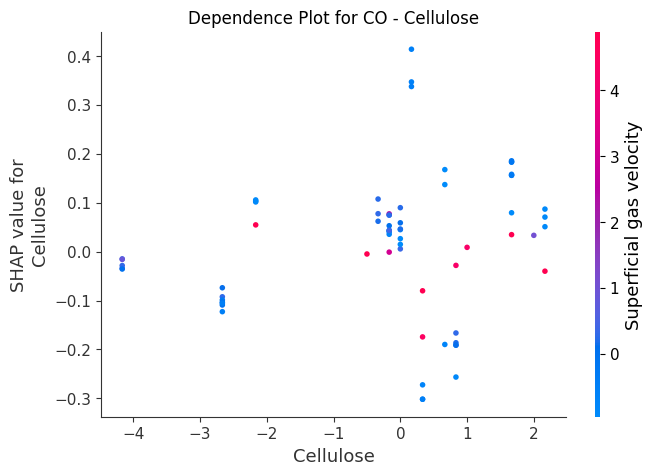

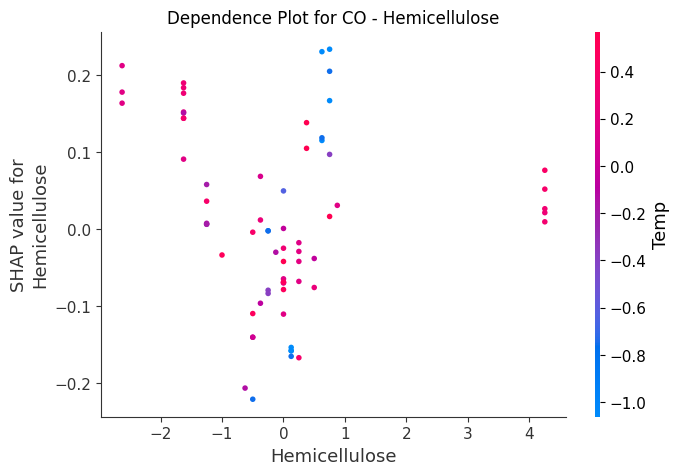

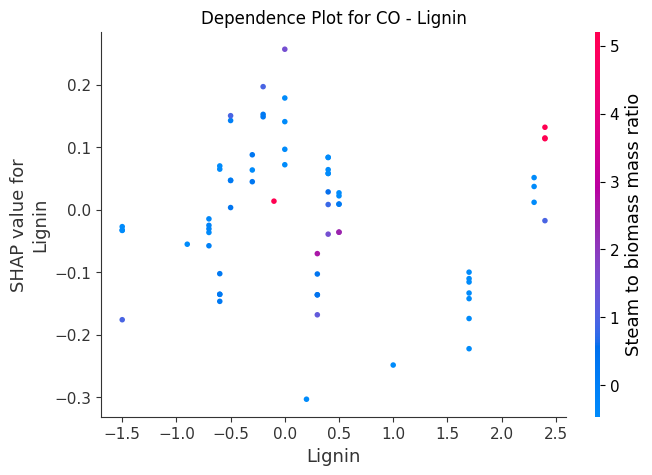

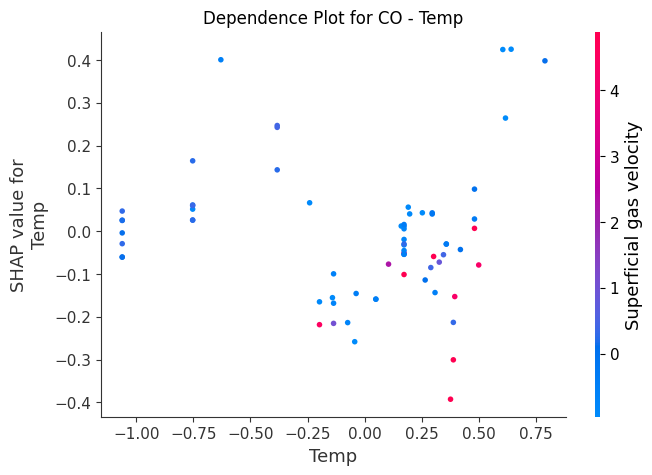

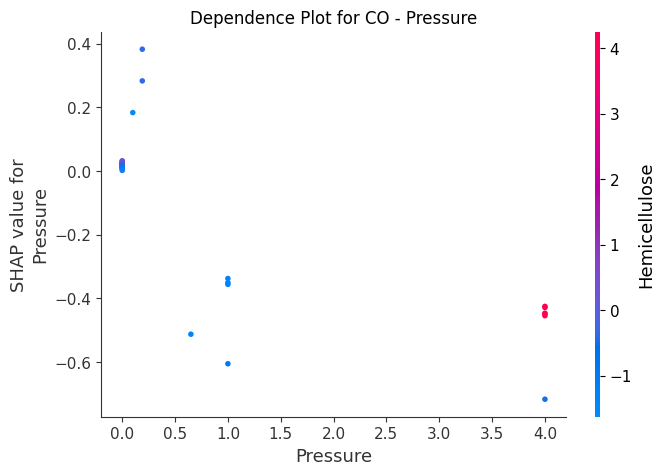

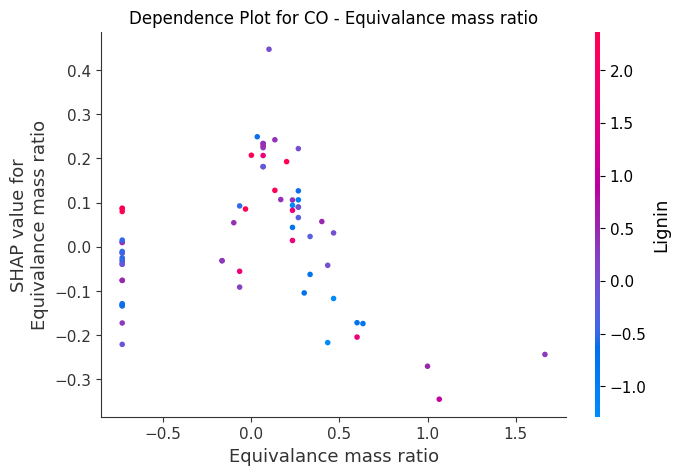

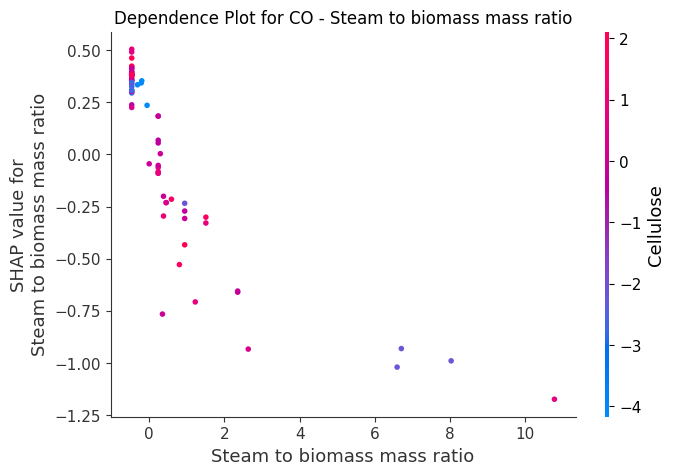

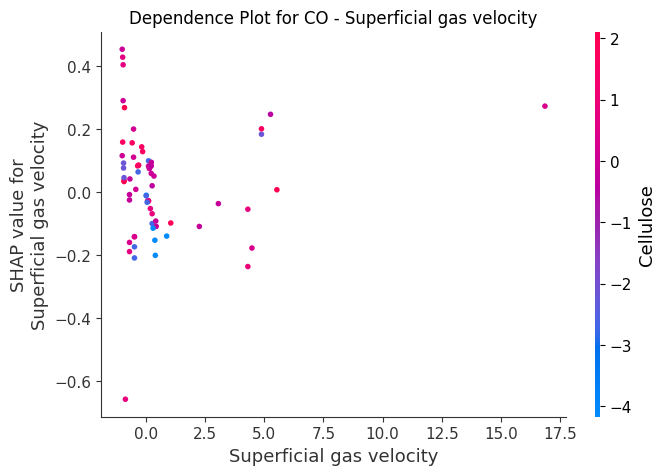

SHAP analysis for target variable: CO2


 98%|===================| 465/476 [00:33<00:00]       

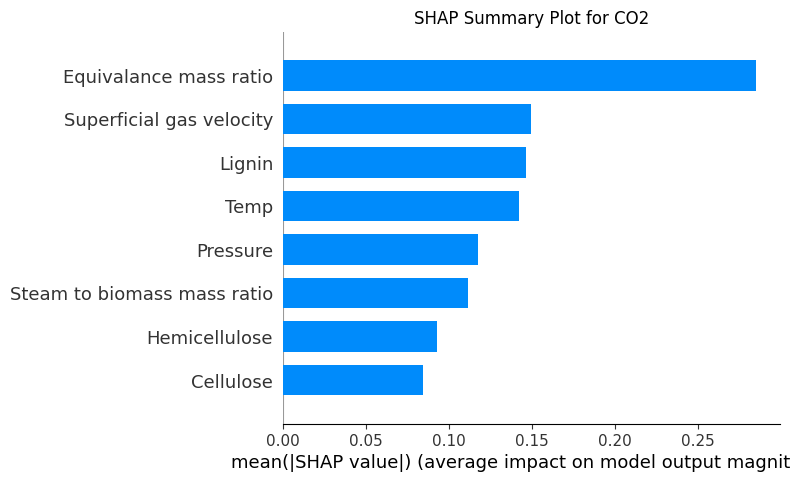

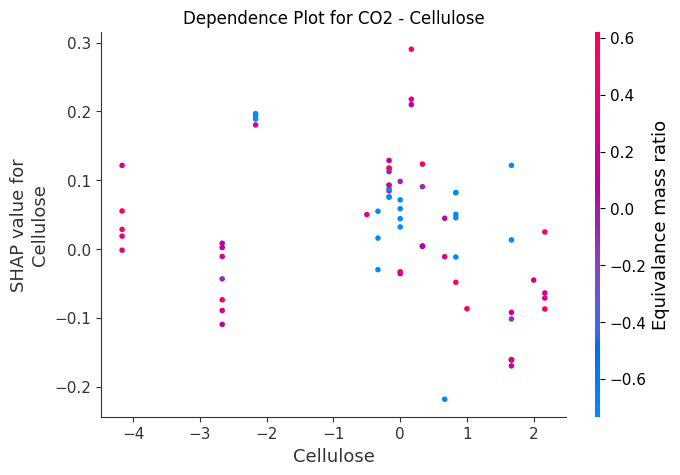

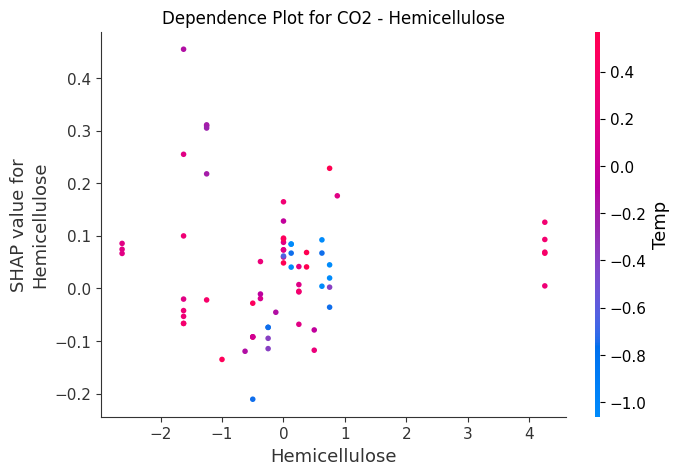

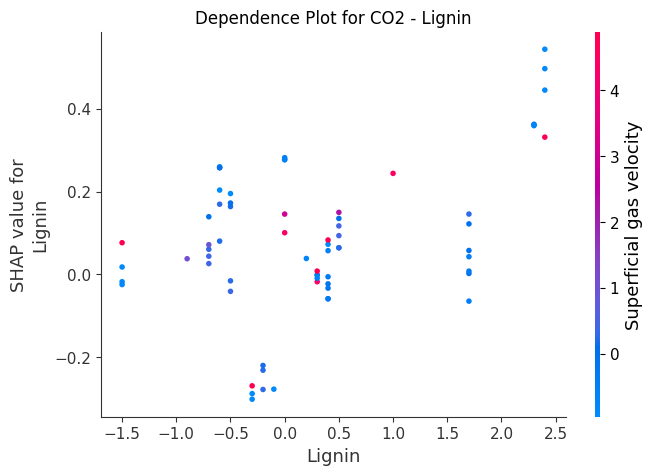

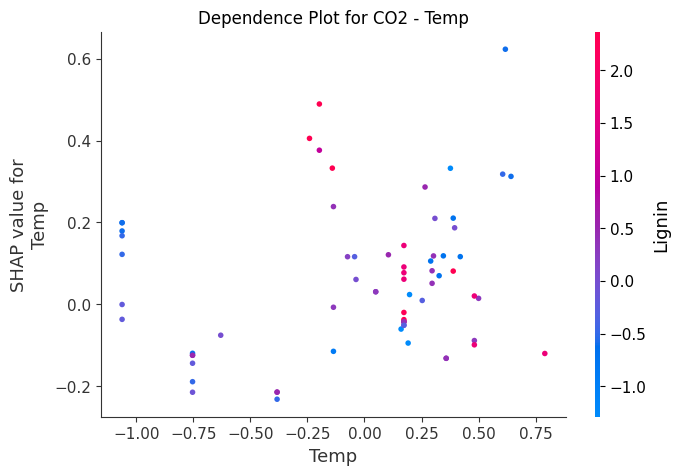

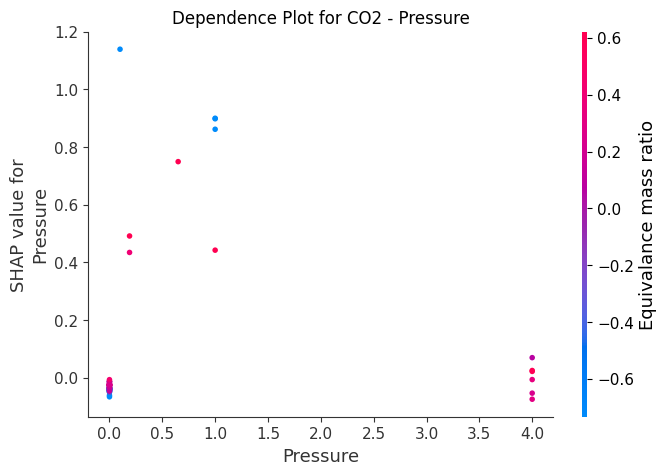

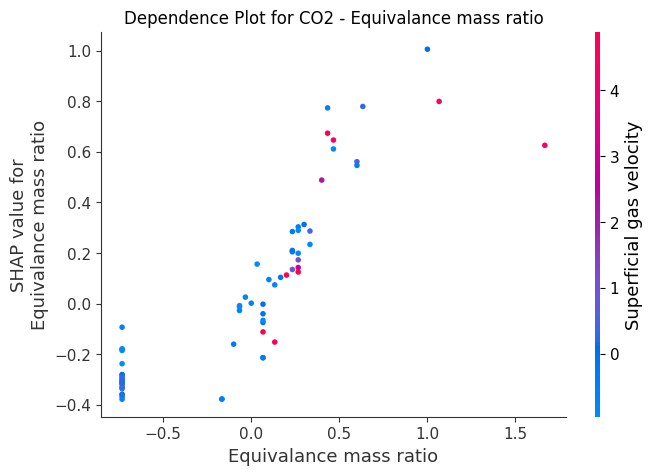

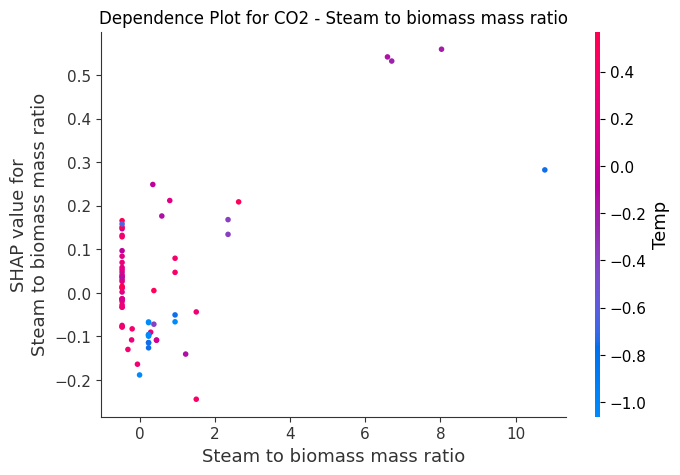

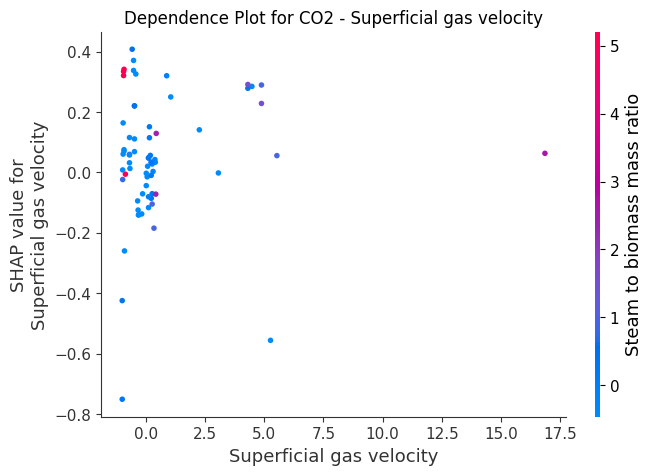

SHAP analysis for target variable: CH4


 99%|===================| 470/476 [00:34<00:00]       

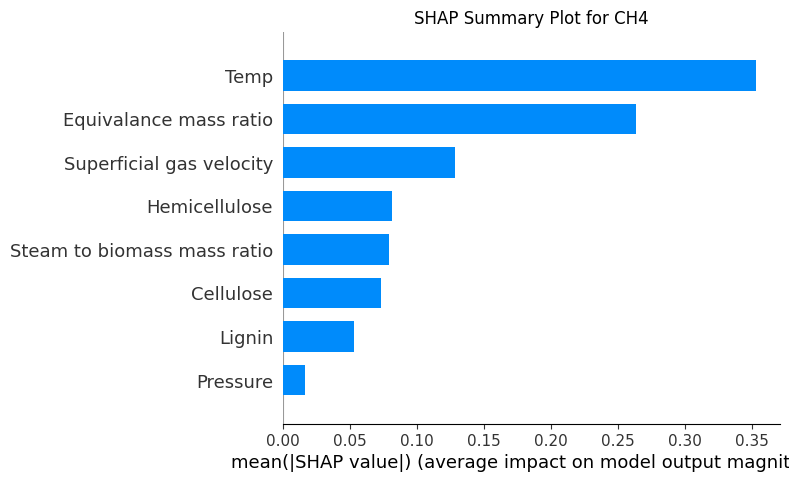

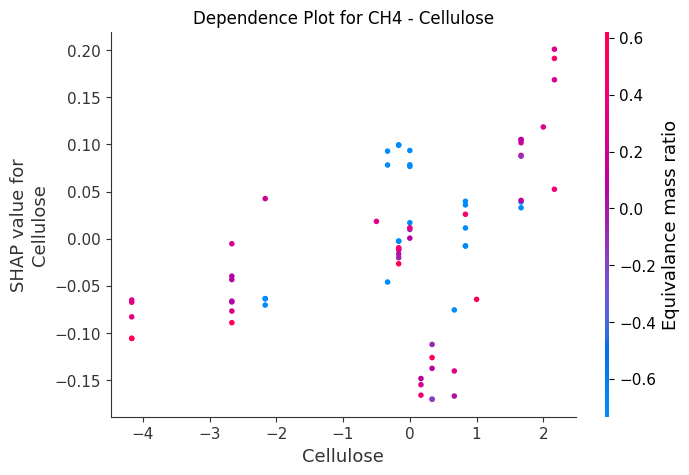

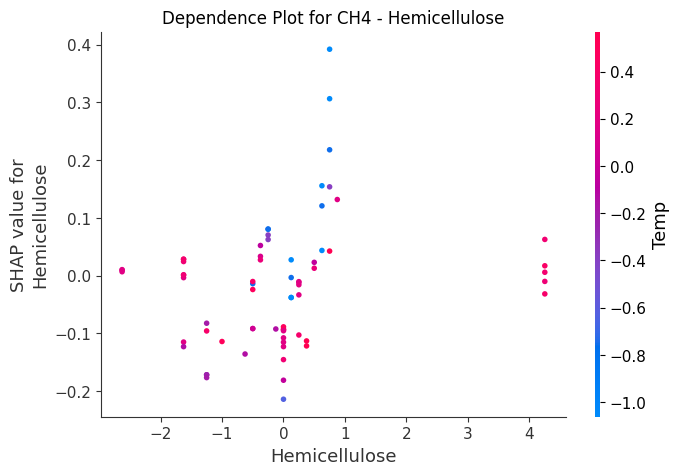

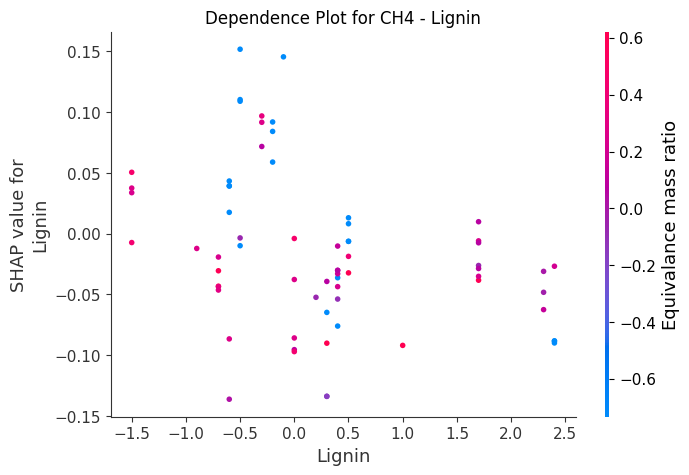

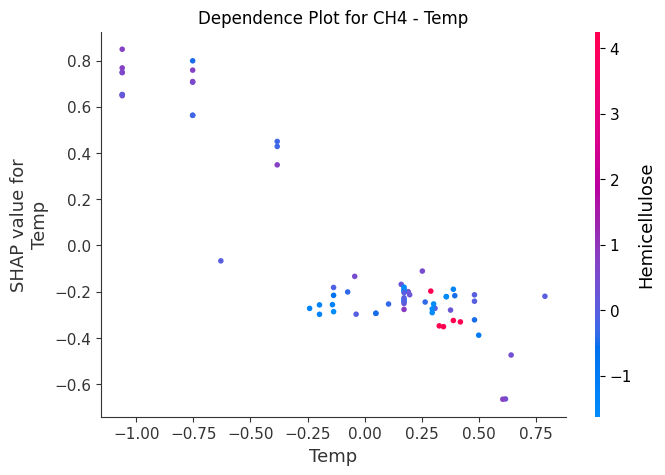

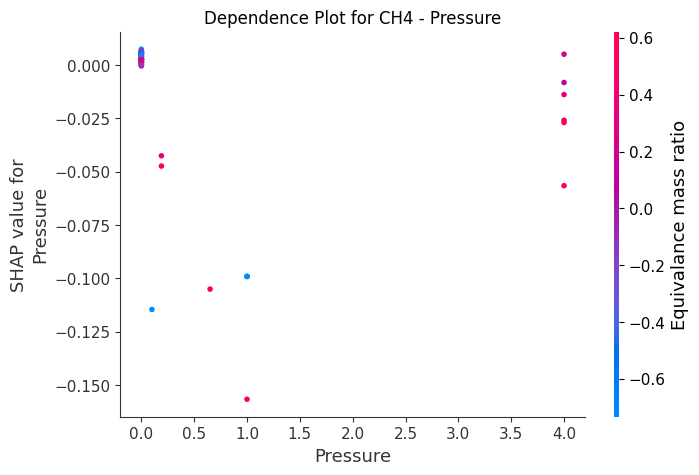

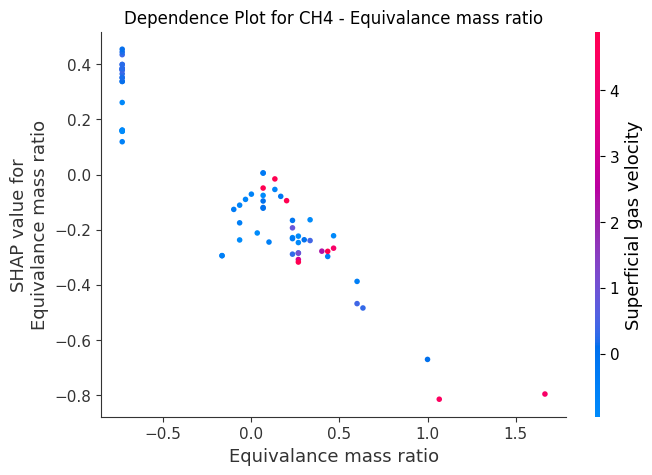

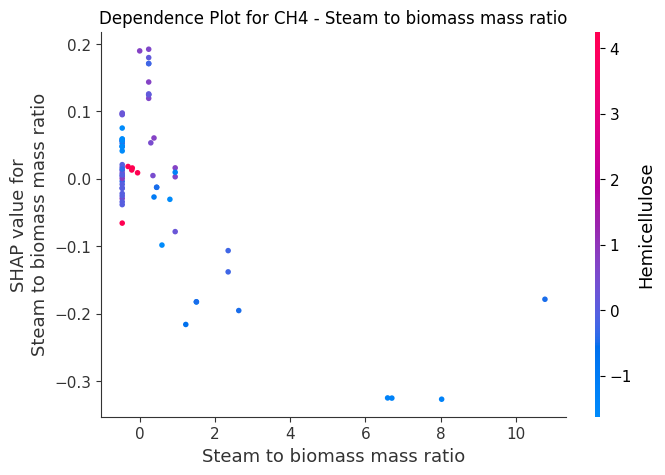

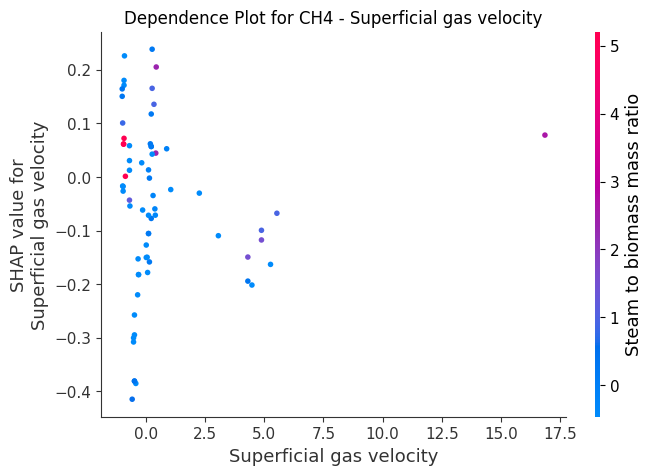

SHAP analysis for target variable: Lower heating value


 99%|===================| 472/476 [00:35<00:00]       

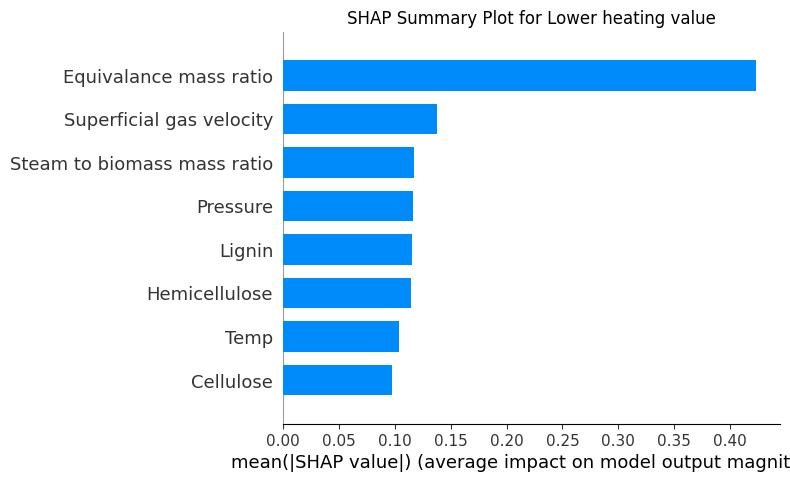

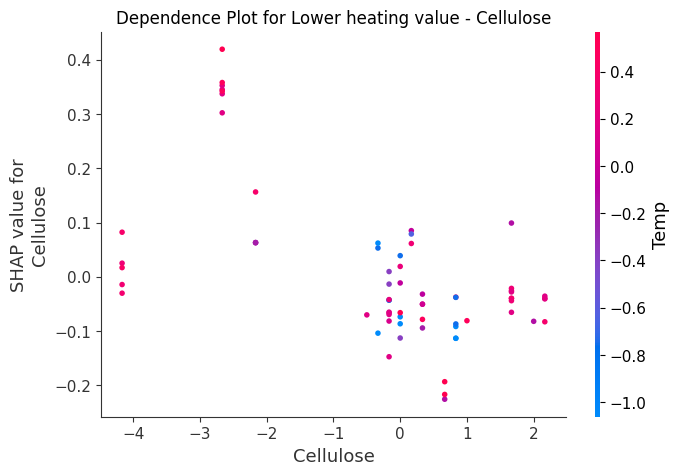

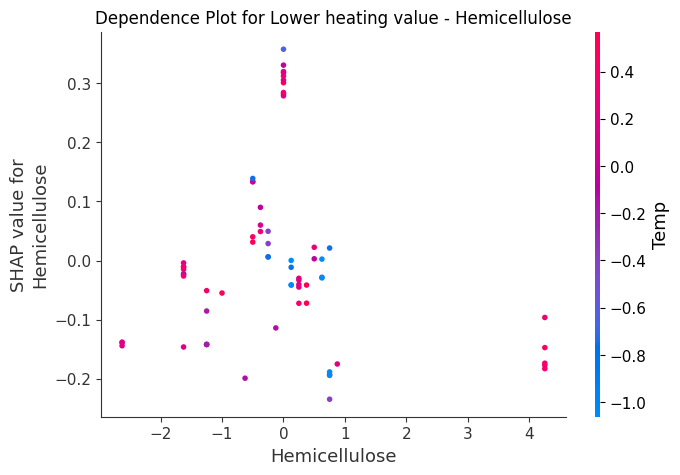

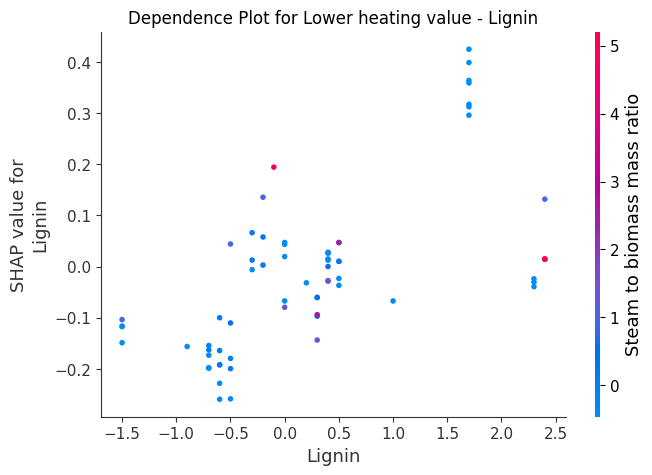

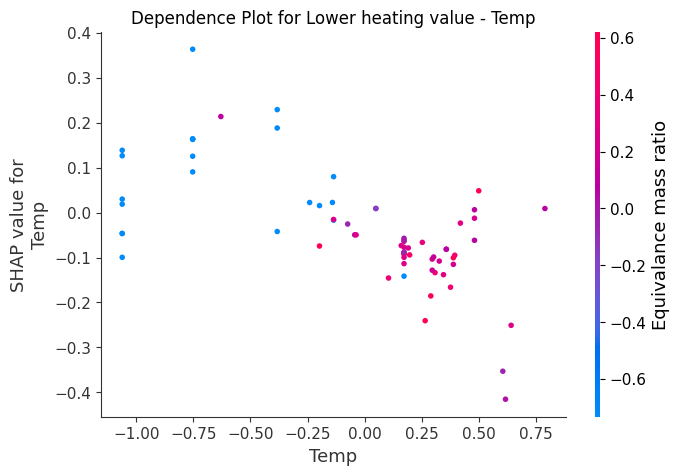

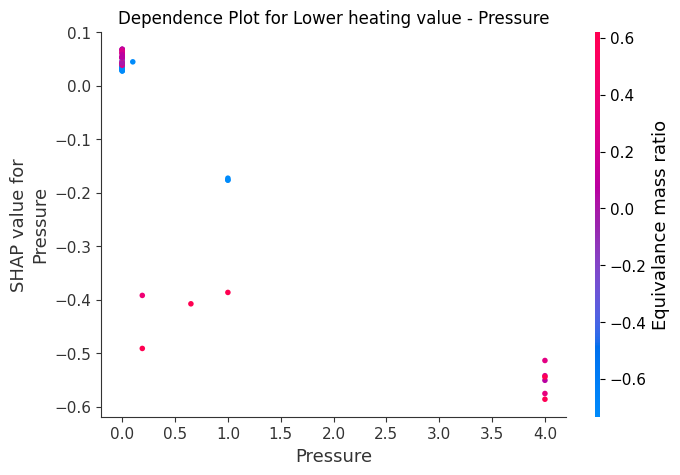

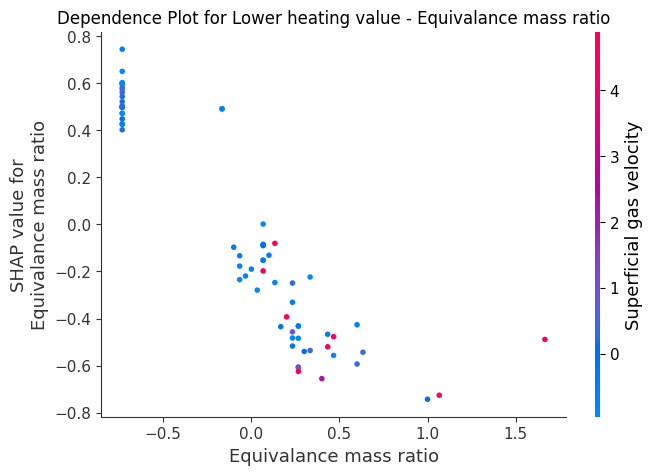

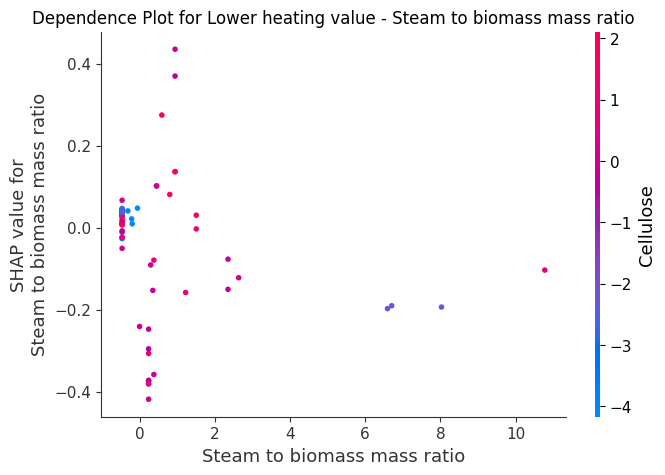

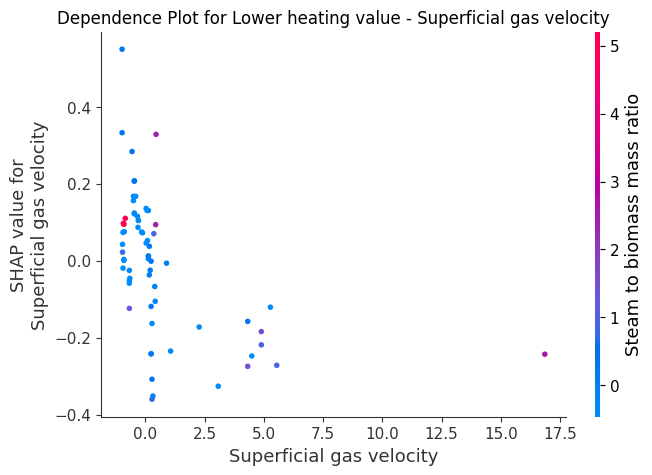

SHAP analysis for target variable: Char yield


 97%|=================== | 464/476 [00:35<00:00]       

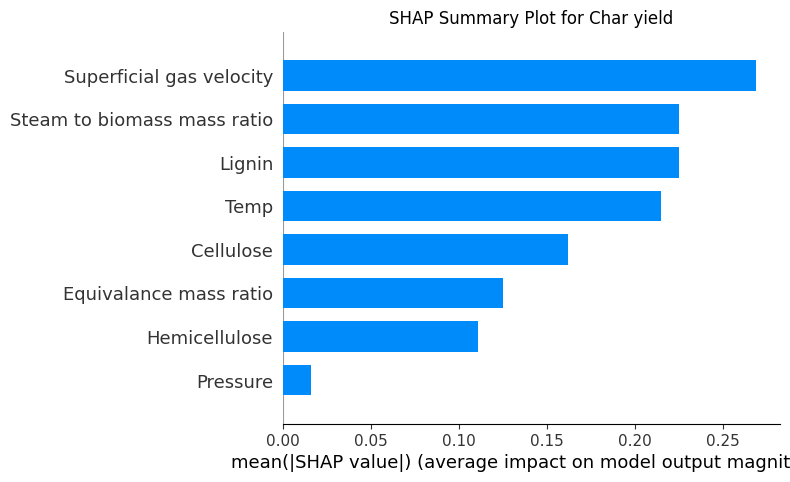

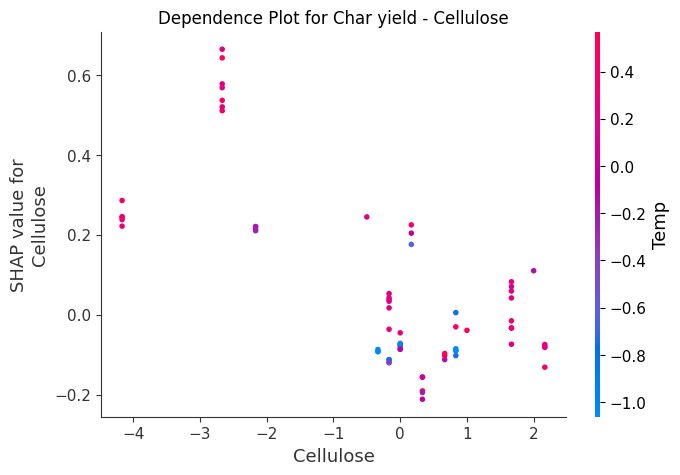

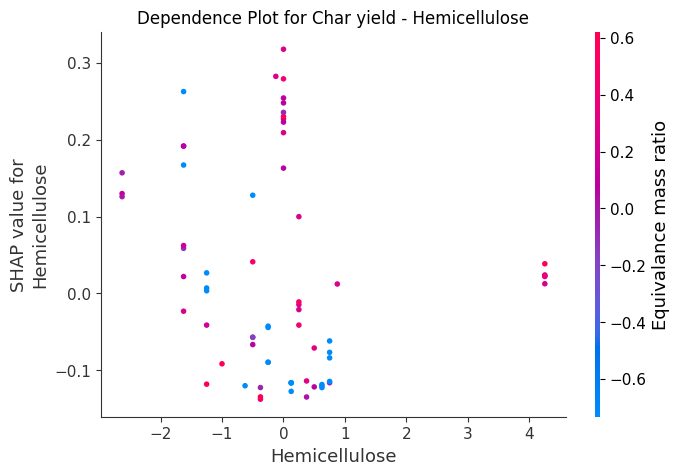

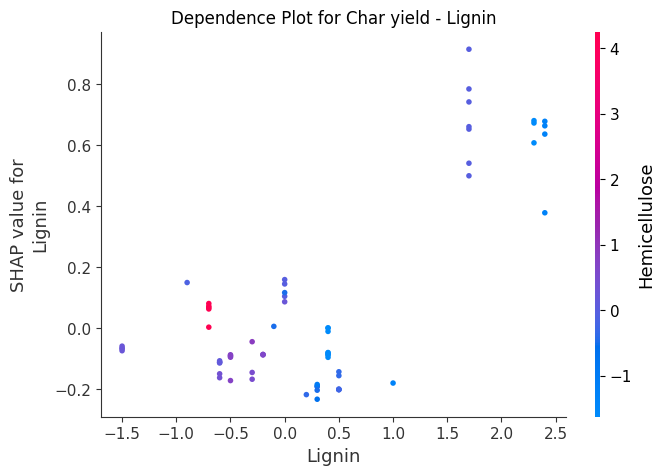

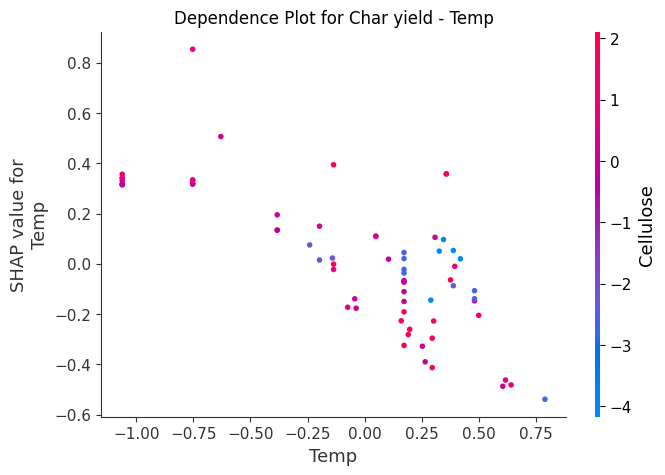

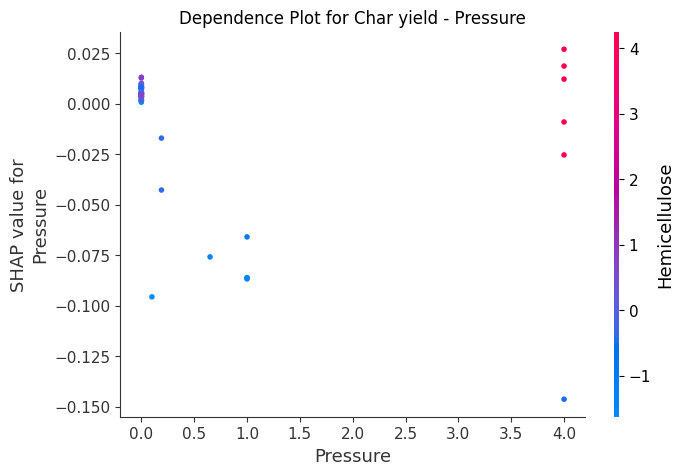

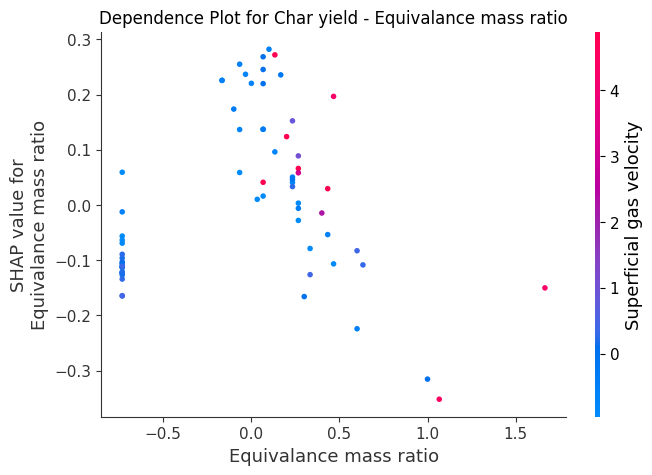

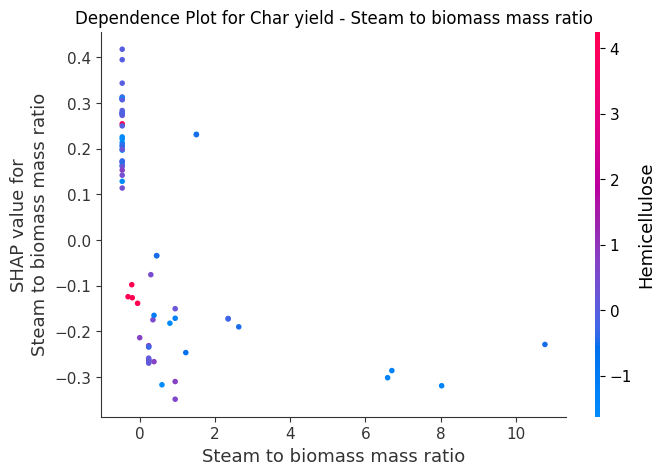

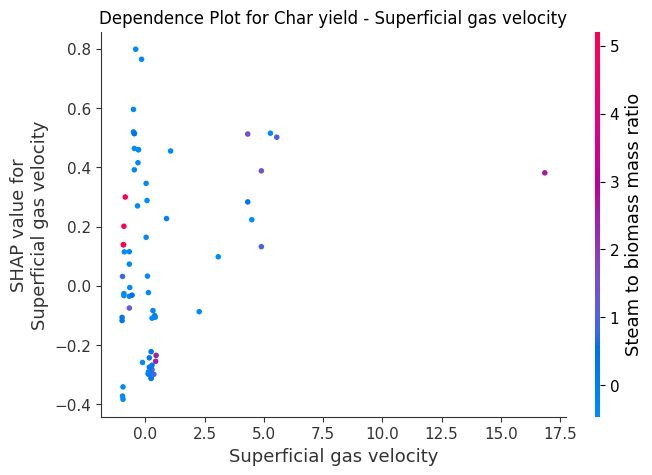

SHAP analysis for target variable: tar yield


 99%|===================| 469/476 [00:34<00:00]       

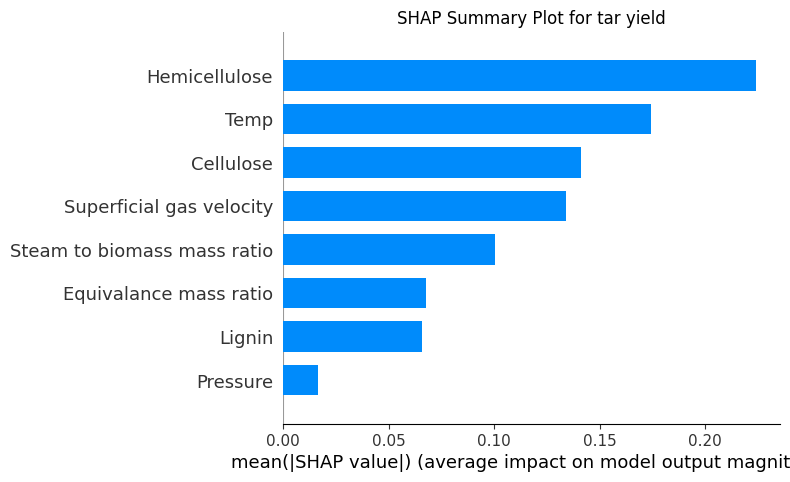

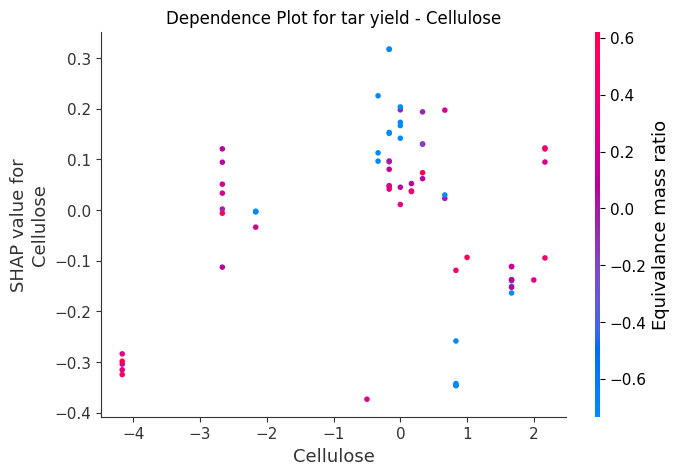

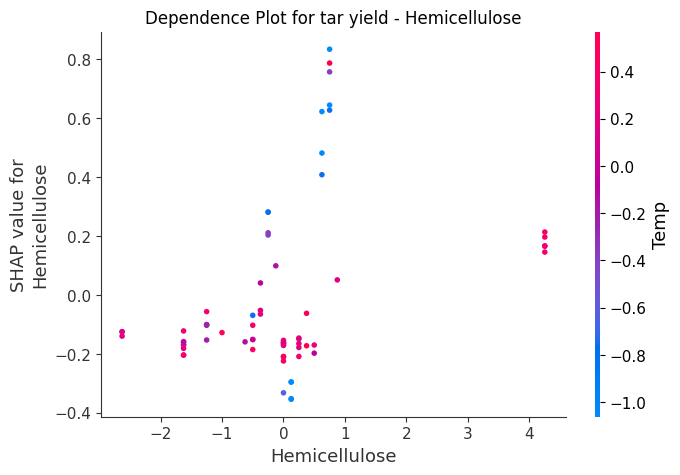

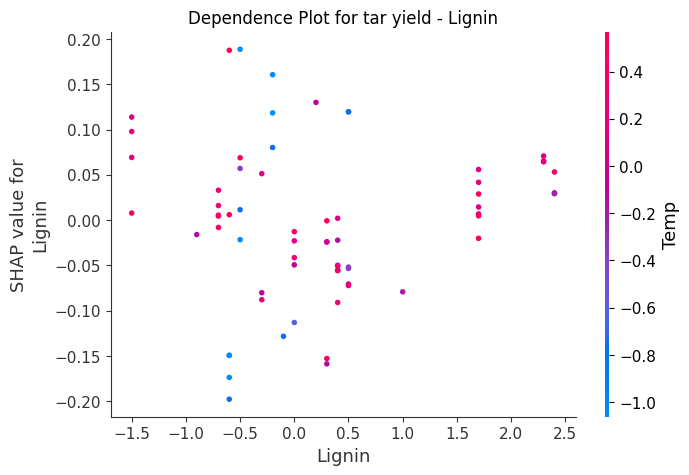

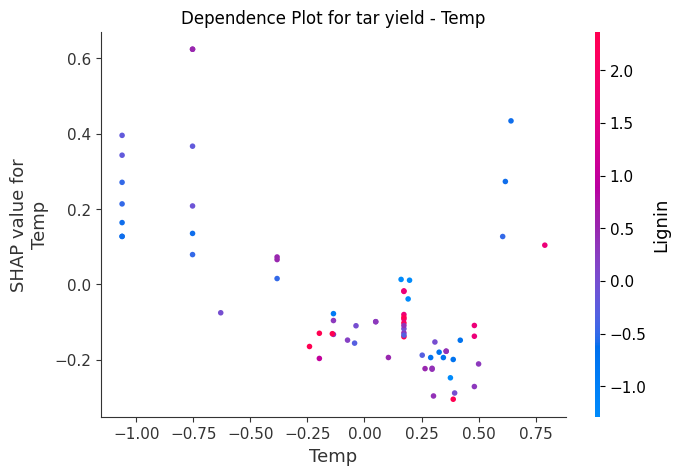

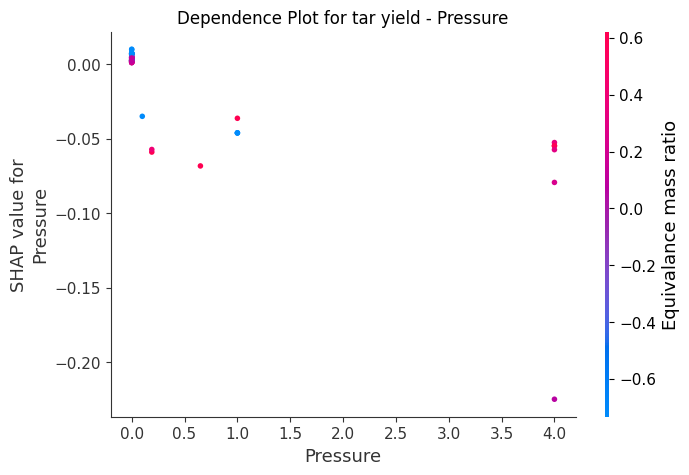

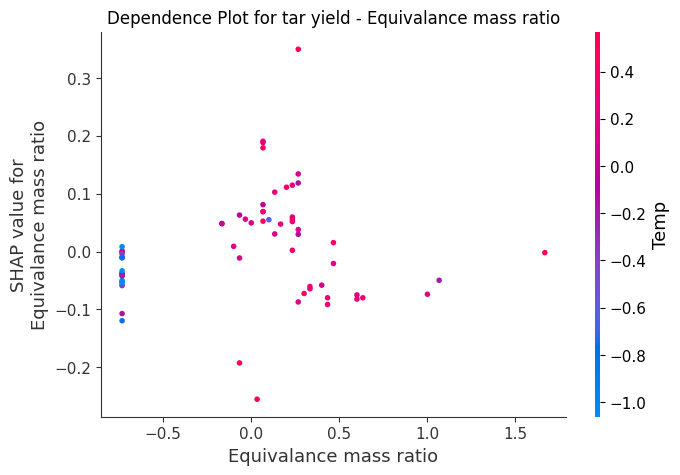

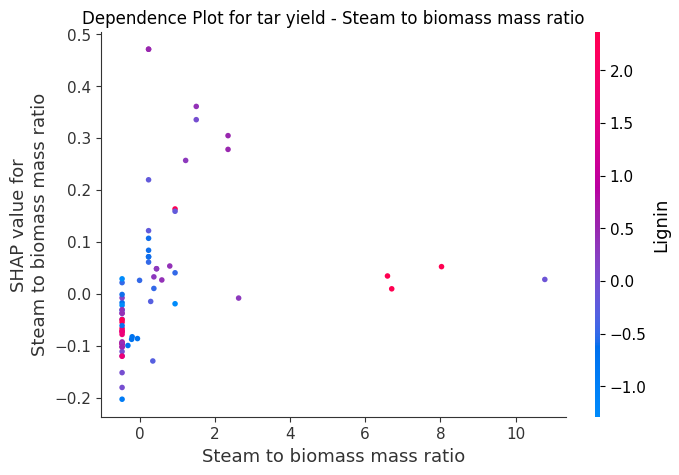

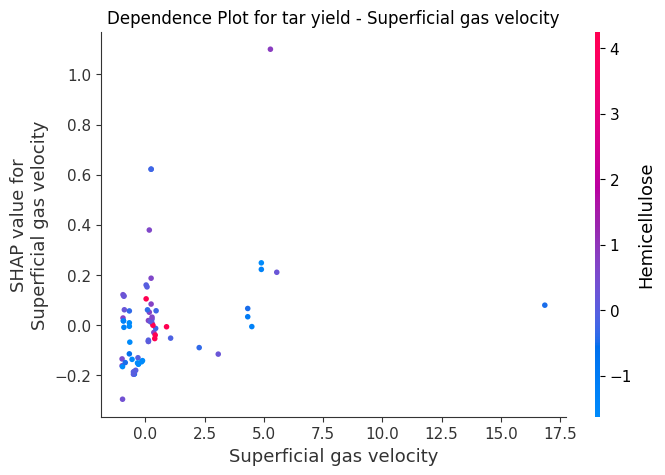

In [14]:
import shap

# Loop over each target variable
for i, target_column in enumerate(y.columns):
    print(f"SHAP analysis for target variable: {target_column}")

    # SHAP values for each target separately
    explainer = shap.Explainer(model, X_train)

    # Compute SHAP values (for X_test)
    shap_values = explainer(X_test)

    # Extract the SHAP values for the current target (i-th target)
    shap_values_for_target = shap_values[..., i]  # Correct extraction of SHAP values for the i-th target output

    # SHAP summary plot for the current target
    shap.summary_plot(shap_values_for_target.values, X_test, plot_type="bar", show=False)
    plt.title(f"SHAP Summary Plot for {target_column}")
    plt.show()

    # Dependence plots for individual features (for each feature of the target variable)
    for feature in X_test.columns:
        shap.dependence_plot(feature, shap_values_for_target.values, X_test, show=False)
        plt.title(f"Dependence Plot for {target_column} - {feature}")
        plt.show()


In [15]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Open a PDF file to store the results
with PdfPages('SHAP_analysis.pdf') as pdf:  # Save directly to the working directory in Colab
    # Loop over each target variable
    for i, target_column in enumerate(y.columns):
        print(f"SHAP analysis for target variable: {target_column}")

        # SHAP values for each target separately
        explainer = shap.Explainer(model, X_train)

        # Compute SHAP values (for X_test)
        shap_values = explainer(X_test)

        # Extract the SHAP values for the current target (i-th target)
        shap_values_for_target = shap_values[..., i]

        # SHAP summary plot for the current target
        shap.summary_plot(shap_values_for_target.values, X_test, plot_type="bar", show=False)
        plt.title(f"SHAP Summary Plot for {target_column}")
        pdf.savefig()  # Save the current figure to the PDF
        plt.close()    # Close the current plot to avoid overlapping plots

        # Dependence plots for individual features
        for feature in X_test.columns:
            shap.dependence_plot(feature, shap_values_for_target.values, X_test, show=False)
            plt.title(f"Dependence Plot for {target_column} - {feature}")
            pdf.savefig()  # Save the current figure to the PDF
            plt.close()    # Close the current plot to avoid overlapping plots

# After saving, you can download the file in Colab using this:
from google.colab import files
files.download('SHAP_analysis.pdf')


SHAP analysis for target variable: H2


 98%|===================| 467/476 [00:36<00:00]       

SHAP analysis for target variable: CO


 97%|=================== | 462/476 [00:34<00:01]       

SHAP analysis for target variable: CO2


 97%|=================== | 461/476 [00:35<00:01]       

SHAP analysis for target variable: CH4


 99%|===================| 473/476 [00:35<00:00]       

SHAP analysis for target variable: Lower heating value


 98%|===================| 468/476 [00:35<00:00]       

SHAP analysis for target variable: Char yield


 99%|===================| 471/476 [00:35<00:00]       

SHAP analysis for target variable: tar yield


 99%|===================| 470/476 [00:34<00:00]       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>